!pip install PyDrive

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '1MsvLFMfOzVC7WX_0Y8mAW9bqeBJC_NbO'})

In [ ]:
download.GetContentFile('train_uniform.zip')
!unzip train_uniform.zip

Archive:  train_uniform.zip
  inflating: train.csv               
  inflating: train/1.jpg             
  inflating: train/10.jpg            
  inflating: train/100.jpg           
  inflating: train/101.jpg           
  inflating: train/102.jpg           
  inflating: train/103.jpg           
  inflating: train/104.jpg           
  inflating: train/105.jpg           
  inflating: train/106.jpg           
  inflating: train/107.jpg           
  inflating: train/108.jpg           
  inflating: train/109.jpg           
  inflating: train/11.jpg            
  inflating: train/110.jpg           
  inflating: train/111.jpg           
  inflating: train/112.jpg           
  inflating: train/113.jpg           
  inflating: train/114.jpg           
  inflating: train/115.jpg           
  inflating: train/116.jpg           
  inflating: train/117.jpg           
  inflating: train/118.jpg           
  inflating: train/119.jpg           
  inflating: train/12.jpg            
  inflating: train/120

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
# from keras.preprocessing import image
import keras.utils as image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

import cv2
from google.colab.patches import cv2_imshow

ModuleNotFoundError: ignored

In [ ]:
train = pd.read_csv('train.csv')

 32%|███▏      | 99/311 [00:11<00:17, 11.82it/s]

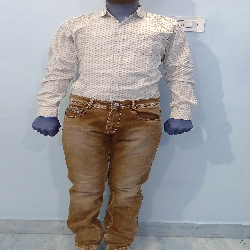

 64%|██████▍   | 199/311 [00:21<00:09, 11.60it/s]

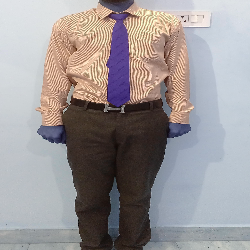

 96%|█████████▌| 299/311 [00:31<00:01,  6.55it/s]

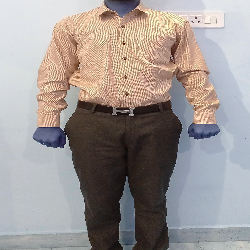

100%|██████████| 311/311 [00:33<00:00,  9.17it/s]


In [ ]:
# We have grayscale images, so while loading the images we will keep grayscale=True, if you have RGB images, you should set grayscale as False
train_image = []
count=0
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/'+train['id'][i].astype('str')+'.jpg', target_size=(32,32,3), grayscale=False)
    img = image.img_to_array(img)
    # img = img/255
    train_image.append(img)

    count=count+1
    if(count%100==0):
      hello = image.load_img('train/'+train['id'][i].astype('str')+'.jpg', target_size=(250,250,3), grayscale=False)
      hello = image.img_to_array(hello)
      cv2_imshow(hello)

X = np.array(train_image)

In [ ]:
y=train['label'].values
y = to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
model = Sequential()
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))

model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(2, activation='softmax'))
# model.add(Dense(2, activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 50)        1400      
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 75)        33825     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 75)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 75)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 125)       84500     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 125)        0         
 2D)                                                  

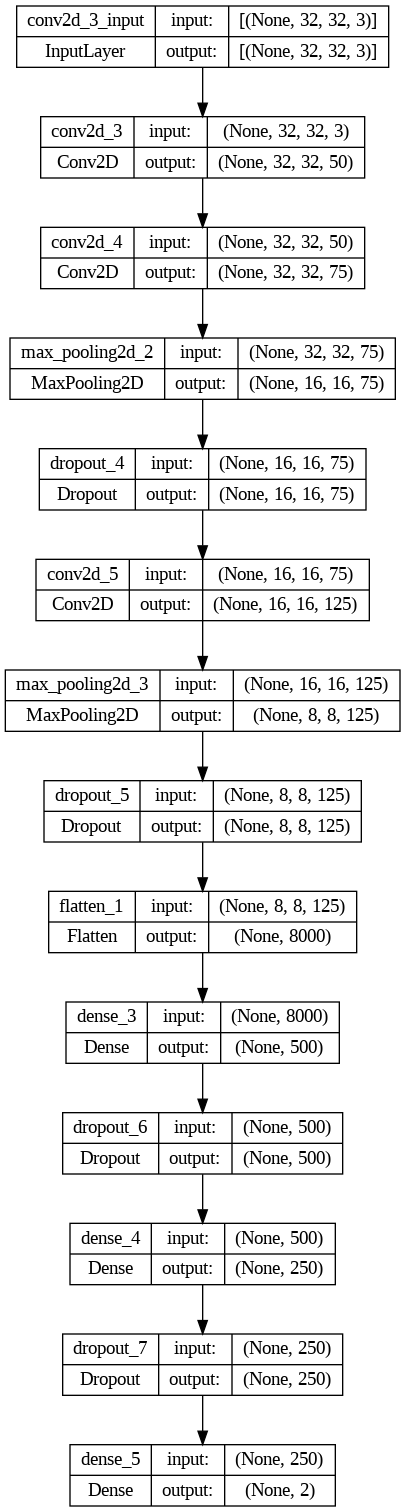

In [ ]:

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=128,epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
2/2 [==============================] - 5s 2s/step - loss: 47.2915 - accuracy: 0.4677 - val_loss: 30.0739 - val_accuracy: 0.5556
Epoch 2/10
2/2 [==============================] - 3s 2s/step - loss: 35.3046 - accuracy: 0.6290 - val_loss: 3.4153 - val_accuracy: 0.5556
Epoch 3/10
2/2 [==============================] - 5s 3s/step - loss: 6.0958 - accuracy: 0.5685 - val_loss: 2.8490 - val_accuracy: 0.4444
Epoch 4/10
2/2 [==============================] - 4s 2s/step - loss: 4.3114 - accuracy: 0.4758 - val_loss: 0.3365 - val_accuracy: 0.9683
Epoch 5/10
2/2 [==============================] - 4s 2s/step - loss: 2.0896 - accuracy: 0.5766 - val_loss: 0.7142 - val_accuracy: 0.5556
Epoch 6/10
2/2 [==============================] - 3s 2s/step - loss: 1.5464 - accuracy: 0.6694 - val_loss: 0.3051 - val_accuracy: 0.7937
Epoch 7/10
2/2 [==============================] - 5s 3s/step - loss: 0.8837 - accuracy: 0.7097 - val_loss: 0.2592 - val_accuracy: 1.0000
Epoch 8/10
2/2 [======================

In [ ]:
download = drive.CreateFile({'id': '1yS9CE50nKWtK6E8EdF'})   #change id and name for new test set
download.GetContentFile('test_uniform_1.zip')
!unzip test_uniform_1.zip

Archive:  test_uniform_1.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test.csv                
  inflating: test/1.jpg              
  inflating: test/10.jpg             
  inflating: test/11.jpg             
  inflating: test/12.jpg             
  inflating: test/13.jpg             
  inflating: test/14.jpg             
  inflating: test/15.jpg             
  inflating: test/16.jpg             
  inflating: test/17.jpg             
  inflating: test/18.jpg             
  inflating: test/19.jpg             
  inflating: test/2.jpg              
  inflating: test/20.jpg             
  inflating: test/21.jpg             
  inflating: test/22.jpg             
  inflating: test/23.jpg             
  inflating: test/24.jpg             
  inflating: test/25.jpg             
  inflating: test/3.jpg              
  inflating: test/4.jpg              
  inflating: test/5.jpg              
  inflating: test/6.jpg              
  inflating: test/7.jpg              
 

In [ ]:
test = pd.read_csv('test.csv')

  0%|          | 0/25 [00:00<?, ?it/s]

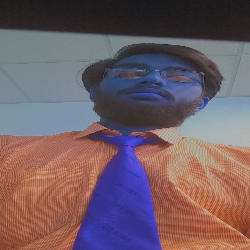

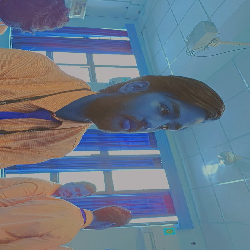

 28%|██▊       | 7/25 [00:00<00:00, 28.85it/s]

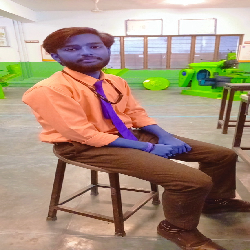

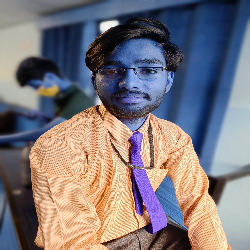

 72%|███████▏  | 18/25 [00:01<00:00,  9.61it/s]

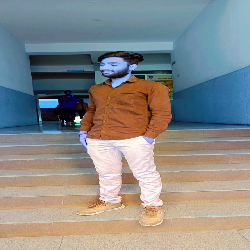

100%|██████████| 25/25 [00:02<00:00, 11.31it/s]


In [ ]:
test_image = []
count=0
for i in tqdm(range(test.shape[0])):
    img = image.load_img('test/'+test['id'][i].astype('str')+'.jpg', target_size=(32,32,3), grayscale=False)
    img = image.img_to_array(img)
    # img = img/255
    test_image.append(img)
    count=count+1
    if(count in [2,3,8,10,19]):
      hello = image.load_img('test/'+test['id'][i].astype('str')+'.jpg', target_size=(250,250,3), grayscale=False)
      hello = image.img_to_array(hello)
      # cv2_imshow(hello)
test = np.array(test_image)

In [ ]:
# making predictions

prediction = model(test)
print(prediction)

tf.Tensor(
[[0.41767183 0.5823281 ]
 [0.43242383 0.5675761 ]
 [0.57997584 0.42002422]
 [0.5940219  0.4059781 ]
 [0.6059057  0.39409414]
 [0.37803063 0.6219692 ]
 [0.12336805 0.87663203]
 [0.06405795 0.93594205]
 [0.1183789  0.88162106]
 [0.4707272  0.52927285]
 [0.07352544 0.9264746 ]
 [0.6089011  0.39109898]
 [0.16620179 0.8337983 ]
 [0.11572102 0.88427895]
 [0.38477838 0.6152216 ]
 [0.30351815 0.6964819 ]
 [0.19281523 0.8071847 ]
 [0.20233467 0.79766524]
 [0.5786697  0.42133033]
 [0.25671756 0.74328244]
 [0.3525129  0.6474871 ]
 [0.39689374 0.60310626]
 [0.6202571  0.37974295]
 [0.46433824 0.5356617 ]
 [0.11801083 0.8819892 ]], shape=(25, 2), dtype=float32)


In [ ]:
download = drive.CreateFile({'id': 'qdhgsdfzc1ySE5KW6E8EdF'})   #change id and name for new test set
download.GetContentFile('sample_uniform.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# creating submission file
sample = pd.read_csv('sample_uniform.csv')
# sample=prediction(sample)
sample['label'] = prediction
sample.to_csv('sample_cnn.csv', header=True, index=False)